In [ ]:
# GPU selection
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [2]:
import time
import pickle

import numpy as np
import pandas as pd

import cudf
from cuml.cluster import KMeans, DBSCAN
from cuml.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
results_flat = np.asarray(pickle.load(open("./cache2/features.pickle", "rb")))

og_train_data = pickle.load(open("./cache2/train_feat.pickle", "rb"))

labels_truth = og_train_data[-1].flatten().tolist()

In [4]:
def np2cudf(array):
    # convert numpy array to cuDF dataframe
    df = pd.DataFrame({'fea%d'%i:array[:,i] for i in range(array.shape[1])})
    df.info()
    pdf = cudf.DataFrame()
    for c,column in enumerate(df):
        pdf[str(c)] = df[column]
    return pdf

In [5]:
gpu_df = np2cudf(results_flat)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Columns: 1536 entries, fea0 to fea1535
dtypes: float32(1536)
memory usage: 703.1 MB


In [6]:
start = time.time()

kmeans = KMeans(n_clusters=4, n_gpu=1)
kmeans.fit(gpu_df)

print("Time taken:", round(time.time()-start, 2))

labels = kmeans.labels_.to_array().tolist()

Time taken: 5.79


In [7]:
pca = PCA(n_components = 3)
gpu_df_pca = pca.fit_transform(gpu_df)

In [8]:
x = gpu_df_pca["0"].to_array()
y = gpu_df_pca["1"].to_array()
z = gpu_df_pca["2"].to_array()

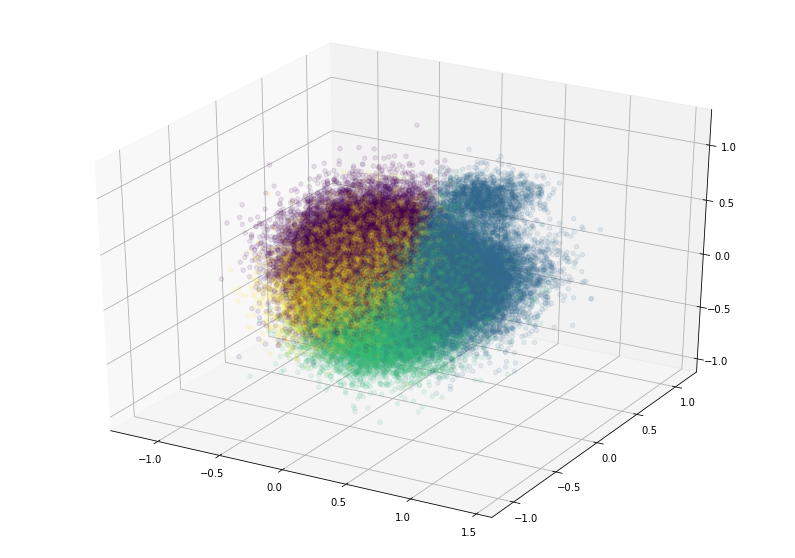

In [9]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=labels, alpha=0.1)

plt.show()

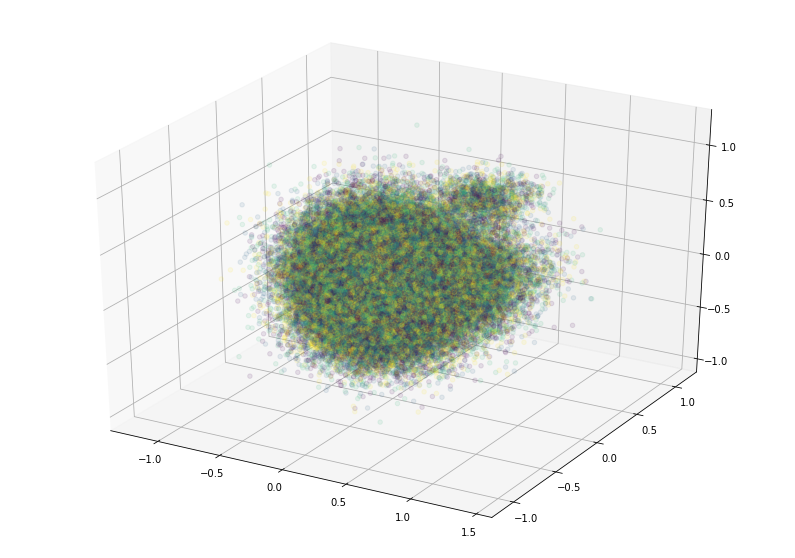

In [10]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=labels_truth, alpha=0.1)

plt.show()

In [11]:
class_0_matches = {"0": 0,
                   "1": 0,
                   "2": 0,
                   "3": 0}

class_1_matches = {"0": 0,
                   "1": 0,
                   "2": 0,
                   "3": 0}

class_2_matches = {"0": 0,
                   "1": 0,
                   "2": 0,
                   "3": 0}

class_3_matches = {"0": 0,
                   "1": 0,
                   "2": 0,
                   "3": 0}

for i, label_truth in enumerate(labels_truth):
    if label_truth == 0:
        label_knn = str(labels[i])
        class_0_matches[label_knn] += 1
    elif label_truth == 1:
        label_knn = str(labels[i])
        class_1_matches[label_knn] += 1
    elif label_truth == 2:
        label_knn = str(labels[i])
        class_2_matches[label_knn] += 1
    elif label_truth == 3:
        label_knn = str(labels[i])
        class_3_matches[label_knn] += 1

In [12]:
class_0_matches

{'0': 7803, '1': 7921, '2': 7707, '3': 6569}

In [13]:
class_1_matches

{'0': 7933, '1': 7798, '2': 7713, '3': 6556}

In [14]:
class_2_matches

{'0': 7898, '1': 7834, '2': 7710, '3': 6558}

In [15]:
class_3_matches

{'0': 7924, '1': 7915, '2': 7562, '3': 6599}